In [3]:
#pip install backtrader
#pip install quantstats

In [5]:
import backtrader as bt
from datetime import datetime
import pandas as pd
import quantstats as qs

In [77]:
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=9,  # period for the fast moving average
        pslow=21   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.EMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.EMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.YahooFinanceData(dataname='AMZN',
                                 fromdate=datetime(2011, 1, 1),
                                 todate=datetime(2021, 3, 31))

cerebro.adddata(data)  # Add the data feed
cerebro.resampledata(data, )
cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.addwriter(bt.WriterFile, csv=True, out='log.csv')
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')
results = cerebro.run()  # run it all
strat=results[0]
#cerebro.plot()  # and plot it with a single command

In [78]:
portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)

In [79]:
qs.reports.html(returns,'AMZN', output='BT001_AMZN Test.html', title='AMZN 9D & 21D EMA Cross - BT001 Test')

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2011-01-03  2011-01-03
End Period          2021-03-30  2021-03-30
Risk-Free Rate      0.0%        0.0%
Time in Market      69.0%       100.0%

Cumulative Return   17.99%      1,597.38%
CAGR%               1.63%       31.84%

Sharpe              0.61        1.04
Sortino             0.91        1.57
Sortino/√2          0.64        1.11

Max Drawdown        -7.2%       -34.1%
Longest DD Days     745         517

Gain/Pain Ratio     0.19        0.21
Gain/Pain (1M)      0.82        1.45

Payoff Ratio        1.05        1.09
Profit Factor       1.19        1.21
Common Sense Ratio  1.28        1.27
CPC Index           0.66        0.71
Tail Ratio          1.08        1.05
Outlier Win Ratio   52.08       2.31
Outlier Loss Ratio  27.18       2.22

MTD                 0.0%        -1.22%
3M                  -1.68%      -3.7%
6M                  -4.51%      -1.29%
YTD                 -2.37%    

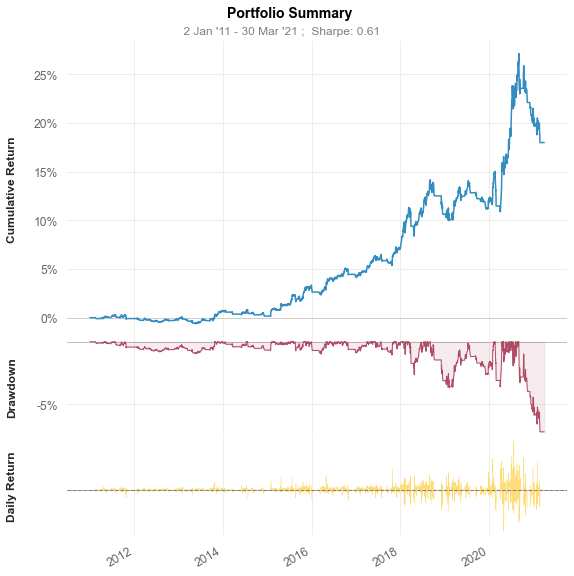

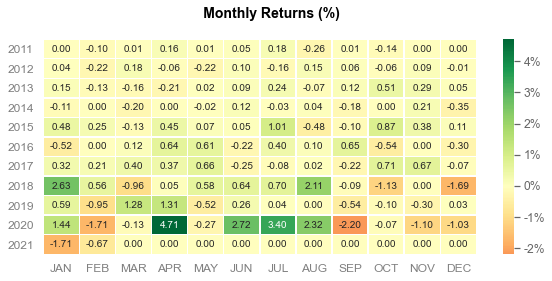

In [80]:
qs.reports.basic(returns, 'AMZN')